## PathTiMEx, a generative probabilistic graphical model of cancer progression.


PathTiMex is a **probabilistic model** of tumor progression among mutually exclusive driver pathways. This model was used to infer cancer progression in colorectal cancer.

<img src="pathTiMEx.png"
     style="width:600px; height: 450px" 
     align="center"/>
     
This **generative model** is mapped into an **evolutionary model**, where deviations from monotonicity are allowed.

In [15]:
## First, it is necessary to load OncoSimulR package
library(OncoSimulR)

In [16]:
## Restriction table (extended version of the poset)
colcancer <- data.frame(
                 parent = c(rep("Root",3), "A", "B", "C"), ## Parent nodes
                 child = c("A", "B", "D", "C", "E", "E"), ## Child nodes
                 s = c(0.5, 0.2, 0.05, 0.1, rep(0.05, 2)), ## Restrictions are satisfied
                 sh = -0.3, ## Deviations from monotonicity (penalization)
                 typeDep = "MN" ## Type of dependency 
                  )
## Fitness specification of the poset
colcancer_efec <- allFitnessEffects(
                  colcancer, # Poset
                  geneToModule = c( ## Specification of the modules
                               "Root" = "Root", 
                               "A" = "APC",
                               "B" = "TP53, EVC2",
                               "C" = "KRAS",
                               "D" = "PI3KCA, EPHA",
                               "E" = "FBXW7, TCF7L2"),
                  drvNames = c( ## Specification of drivers
                               "APC", "TP53", "EVC2", "KRAS",
                               "PI3KCA", "EPHA", "FBXW7", "TCF7L2"))

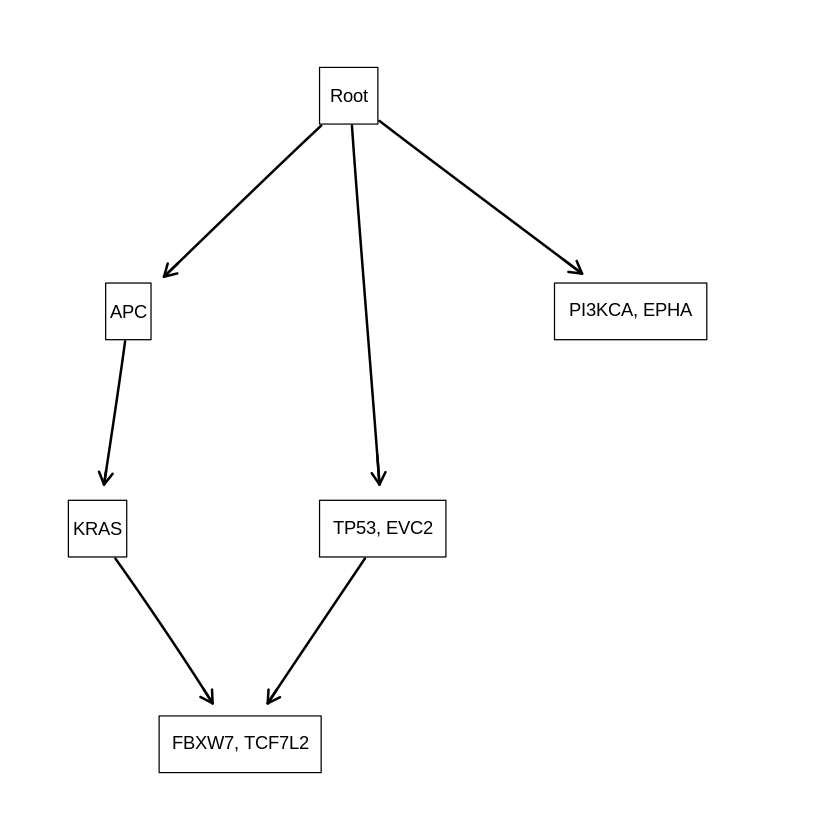

In [4]:
## DAG representation
plot(colcancer_efec, expandModules = TRUE, autofit = TRUE, lwdf = 2)

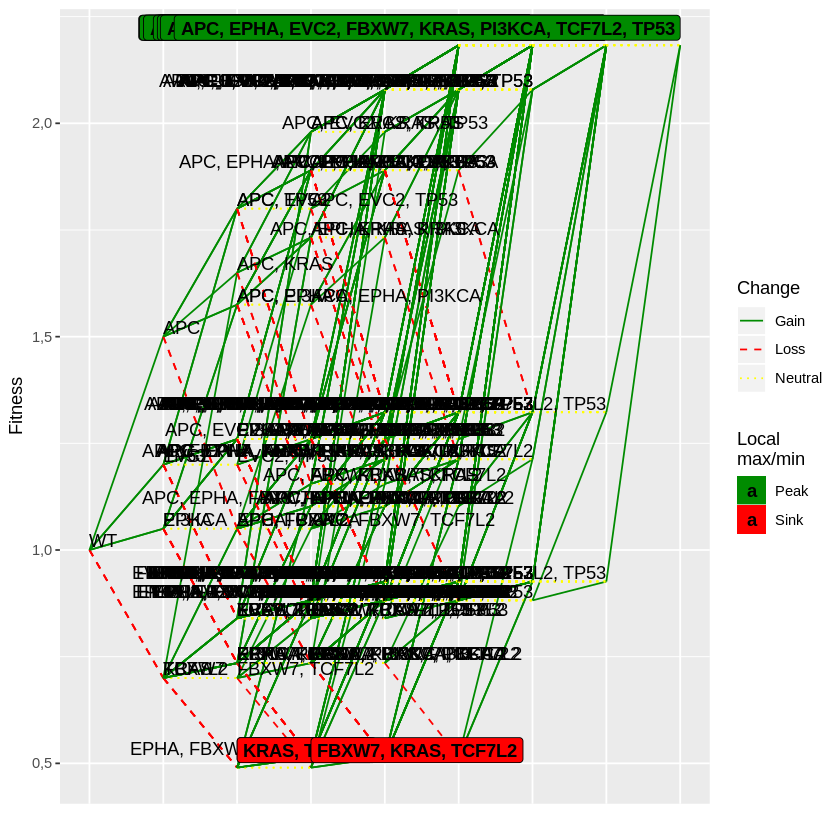

In [5]:
# Evalutation of all genotypes and its fitness
colcancer_efec_FL <- evalAllGenotypes(colcancer_efec, max = 110000)
## Output is not shown due to size of the table.

## Plot of fitness landscape
plotFitnessLandscape(colcancer_efec_FL)

In [17]:
## Fitness specification of the simplified poset
Scolcancer <- allFitnessEffects(colcancer,                
                  geneToModule = c( ## Specification of the modules
                               "Root" = "Root", 
                               "A" = "APC",
                               "B" = "TP53",
                               "C" = "KRAS",
                               "D" = "PI3KCA",
                               "E" = "FBXW7"),
                  
                  drvNames = c( ## Specification of drivers
                               "APC", "TP53", "KRAS",
                               "PI3KCA", "FBXW7")
                  )

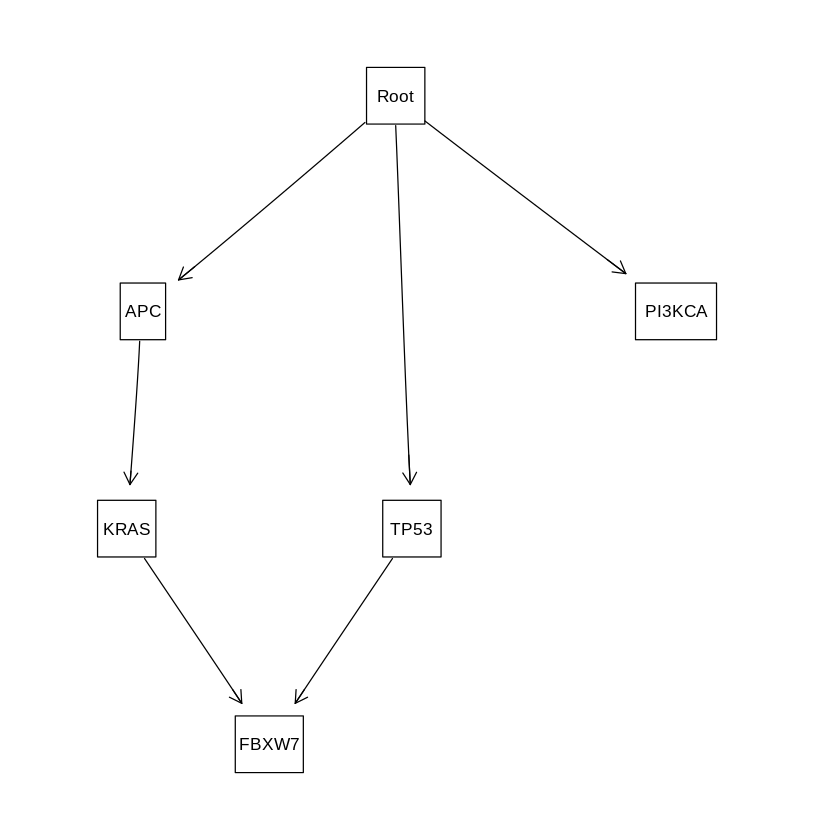

In [4]:
## DAG 
plot(Scolcancer, expandModules = TRUE, autofit = TRUE)

In [19]:
## Obtain all genotypes from the fitnessEffect
(Scolcancer_ge <- evalAllGenotypes(Scolcancer, addwt = TRUE))

Genotype,Fitness
WT,"1,00000"
APC,"1,50000"
FBXW7,"0,70000"
KRAS,"0,70000"
PI3KCA,"1,05000"
TP53,"1,20000"
"APC, FBXW7","1,05000"
"APC, KRAS","1,65000"
"APC, PI3KCA","1,57500"
"APC, TP53","1,80000"


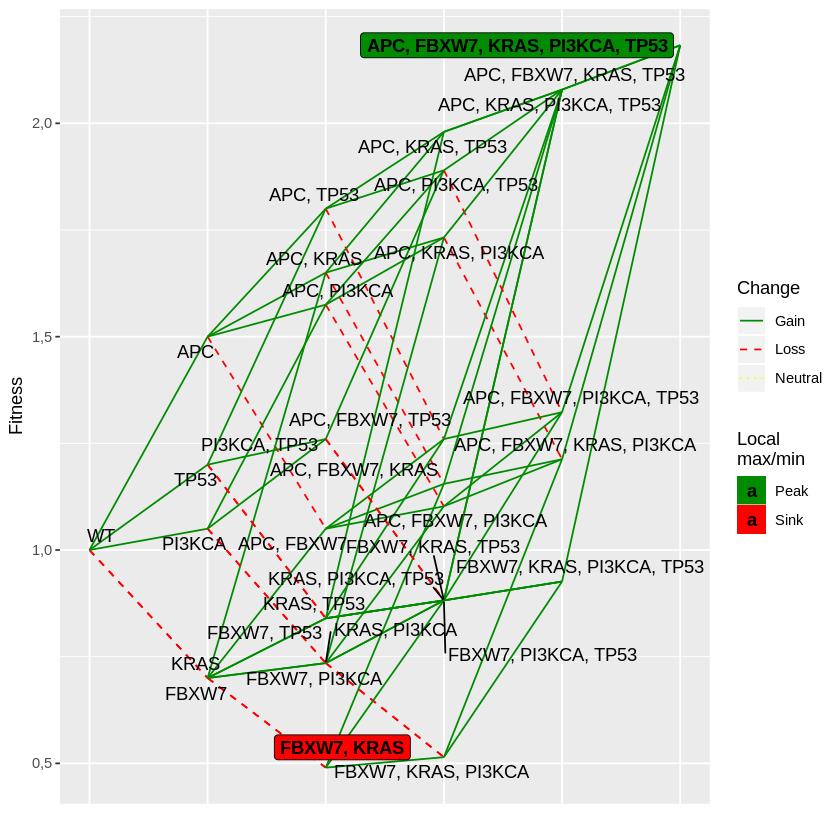

In [8]:
## Fitness landscape of simplified model
plotFitnessLandscape(Scolcancer_ge,
                     use_ggrepel = TRUE)

## Order Effects in cancer progression

Simplified model with 4 genes: APC, TP53, FBXW7 and KRAS. 


In [18]:
## Restriction table 
cc <- data.frame(parent = c(rep("Root", 2), "A", "B", "C"),
                 child = c("A", "C", "B", "D", "D"),
                 s = c(0.5, 0.2, 0.1, rep(0.05,2)),
                 sh = -0.3,
                 typeDep = "MN")
## Fitness effects
cc_visuali <- allFitnessEffects(cc,
                                  geneToModule =
    c("Root" = "Root",
      "A" = "APC",
      "B" = "KRAS",
      "C" = "TP53",
      "D" = "FBXW7") )

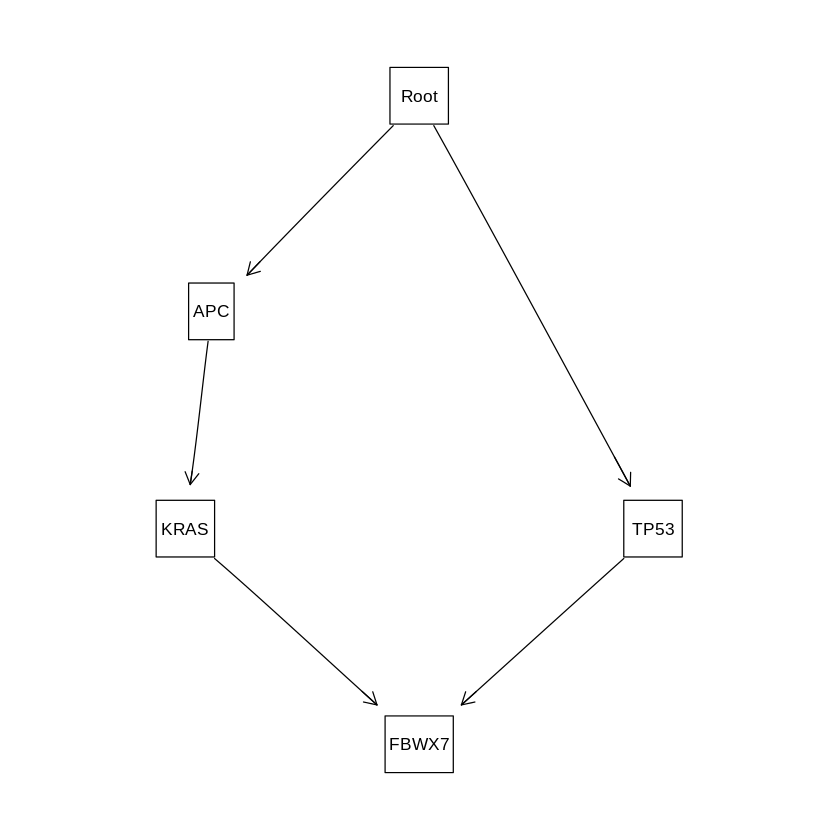

In [3]:
# DAG from the simplified model
plot(cc_visuali, expandModules = TRUE, autofit = TRUE)

Mutation's order is inferred with pathTiMEx through the **waiting time rate parameter**. It informs about the mutation's arise. Fitness value associated to each order is derived from this parameter.


| Gene/module | Waiting time rate parameter  |
| :-----------: | :-------------------------------------: |
|      APC      |                  9.5                    |
|               |                                         |
|     KRAS      |                  2.89                   |
|               |                                         |
|  TP53, EVC2   |                  1.92                   |
|               |                                         |
| PIK3CA, EPHA3 |                  0.17                   |
|               |                                         |
| FBXW7, TCF7L2 |                  0.08                   |



The order in mutations: **APC > TP53 > KRAS > FBWX7** is consistent with restrictions and is associated to the highest fitness value. Different order deviates from monotoniciy and lower fitness is associated.


In [5]:
## Order effects
cc_order <- allFitnessEffects(
  orderEffects = c("A > B > C > D" = 0.5, 
                   "B > A > C > D" = 0.2,
                   "B > C > A > D" = 0.1,
                   "B > C > D > A" = 0.05,
                   "A > C" = 0.2,
                   "C > A" = 0.05,
                   "D > A" = 0.05,
                   "A > D" = 0.2,
                   "B > D" = 0.2,
                   "C > D" = 0.2,
                   "B > C" = 0.2,
                   "C > B" = 0.1,
                   "B > A" = 0.1,
                   "A > B" = 0.3),

  geneToModule =
    c("A" = "APC",
      "B" = "KRAS",
      "C" = "TP53",
      "D" = "FBWX7") )

In [6]:
## Fitness associated to each genotype
(cc_order_geno <- evalAllGenotypes(cc_order, order = TRUE))


Genotype,Fitness
APC,"1,0000"
FBWX7,"1,0000"
KRAS,"1,0000"
TP53,"1,0000"
APC > FBWX7,"1,2000"
APC > KRAS,"1,3000"
APC > TP53,"1,2000"
FBWX7 > APC,"1,0500"
FBWX7 > KRAS,"1,0000"
FBWX7 > TP53,"1,0000"


In [11]:
#DAG
plot(cc_order)


ERROR: Error in `*tmp*`[[i]]: subíndice fuera de  los límites


In [12]:
# Fitness landscape
plotFitnessLandscape(cc_order_geno)

ERROR: Error in to_Fitness_Matrix(x, max_num_genotypes = max_num_genotypes): We cannot deal with order effects yet.
